In [1]:
Libdl.dlopen("/usr/lib/liblapack.so.3", Libdl.RTLD_GLOBAL) #¡Gracias a Luis por arreglar mi problema con PyPlot! 

Ptr{Void} @0x00000000025ae760

In [2]:
using PyPlot

### Ejercicio 1: Relaciones de recurrencia

Así como se hizo en clase para la exponencial, el logaritmo, y las potencias; obtén las series de recurrencia para las siguientes funciones:

* Seno.
* Coseno.
* Tangente.
* Cotangente.

¿Hay algún problema al intentar calcular la cotangente? Si la respuesta es sí ¿cuál?, si la respuesta es no ¿por qué?

Utilizaré las siguentes fórmulas para obtener las relaciones solicitadas

$$
\sin{g(x)} = \sum_{k=0}^{\infty} (\sin{g})_k (x-x_0)^k
$$

$$
\frac{d \sin{g(x)}}{d x}=\cos{g(x)}\cdot g'(x) = \sum_{k=1}^{\infty} k \cdot (\sin{g})_k (x-x_0)^{k-1}
$$

$$
\cos{g(x)}=\sum_{k=0}^\infty (\cos{g})_k (x-x_0)^k
$$

$$
\frac{d \cos{g(x)}}{d x}=-\sin{g(x)}\cdot g'(x) = \sum_{k=1}^{\infty} k \cdot (\cos{g})_k (x-x_0)^{k-1}
$$


$$
g'(x)=\sum_{k=1}^\infty k g_k (x-x_0)^{k-1}
$$

y la fórmula que se había obtenido en clase para el producto y la división

$$
(f(x)\times g(x))_k = \sum_{n=0}^K f_n g_{k-n}
$$

$$
(f(x)\div g(x))_k = \frac{1}{g_0} (f_k - \sum_{i=0}^{k-1}(f \div g)_i g_{k-i})
$$

para el seno entonces se tiene que sustituyendo donde corresponde para las expresiones de su derivada.

$$
\sum_{k=1}^\infty k\cdot(\sin{g})_k \cdot (x-x_0)^{k-1} = \sum_{k=0}^\infty (\cos{g})_k \cdot (x-x_0)^k \sum_{k=1}^\infty k\cdot (g)_k \cdot (x-x_0)^{k-1}
$$

Multiplicando a ambos lado por $(x-x_0)$

$$
\sum_{k=1}^\infty k\cdot(\sin{g})_k \cdot (x-x_0)^{k} = \sum_{k=0}^\infty (\cos{g})_k \cdot (x-x_0)^k \sum_{k=1}^\infty k\cdot (g)_k \cdot (x-x_0)^{k}
$$

Por la regla del producto, si $k > 0$

$$
k(\sin{g})_k = \sum_{i=1}^k i\cdot g_k (\cos{g})_{k-i}
$$

con lo que 

$$
(\sin{g})_k = \begin{cases} \sin{g_0} &\mbox{if } k = 0 \\
 \frac{1}{k}\sum_{i=1}^k i\cdot g_k (\cos{g})_{k-i} & \mbox{if } k > 0 \end{cases} 
 $$
 
para el coseno se hace algo análogo, sustituyendo donde corresponde para las expresiones de su derivada.

$$
\sum_{k=1}^\infty k\cdot(\cos{g})_k \cdot (x-x_0)^{k-1} = -\sum_{k=0}^\infty (\sin{g})_k \cdot (x-x_0)^k \sum_{k=1}^\infty k\cdot (g)_k \cdot (x-x_0)^{k-1}
$$

y se multiplica a ambos lados por $(x-x_0)$

$$
\sum_{k=1}^\infty k\cdot(\cos{g})_k \cdot (x-x_0)^{k} = -\sum_{k=0}^\infty (\sin{g})_k \cdot (x-x_0)^k \sum_{k=1}^\infty k\cdot (g)_k \cdot (x-x_0)^{k}
$$

Por la regla del producto, si $k > 0$

$$
k(\cos{g})_k = -\sum_{i=1}^k i\cdot g_k (\sin{g})_{k-i}
$$

con lo que 

$$
(\cos{g})_k = \begin{cases} \cos{g_0} &\mbox{if } k = 0 \\
 -\frac{1}{k}\sum_{i=1}^k i\cdot g_k (\sin{g})_{k-i} & \mbox{if } k > 0 \end{cases} 
 $$
 
Ahora para la tangente, como $\tan{x}=\sin{x}\div \cos{x}$, para $k>0$, por el algoritmo de los coeficientes de la división entre funciones.

$$
(\tan{g})_k = \frac{1}{\cos{g_0}} ((\sin{g})_k - \sum_{i=0}^{k-1}(\tan{g})_i (\cos{g})_{k-i})
$$

$$
=\frac{1}{\cos{g_0}} (\frac{1}{k}\sum_{i=1}^k i\cdot g_i (\cos{g})_{k-1} - \sum_{i=0}^{k-1}(\tan{g})_i (\cos{g})_{k-i})
$$

$$
=\frac{1}{g_0}(\frac{k g_k (\cos{g})_0}{k} + \frac{1}{k} \sum_{n=1}^{k-1} i \cdot g_i (\cos{g})_{k-i} - \frac{1}{k} \sum_{i=0}^{k-1}(\tan{g})_i (\cos(g))_{k-i})
$$

$$
=\frac{1}{\cos{g_0}}(g_k \cos{g_0} - \frac{1}{k} ( (\tan{g})_0 (\cos{g})_k + \sum_{i=1}^{k-1} \{(\tan{g})_i (\cos{g})_{k-i} - i\cdot g_i (\cos{g})_{k-i} \}) )
$$

$$
=\frac{1}{\cos{g_0}}(g_k \cos{g_0} - \frac{1}{k} ( (\tan{g})_0 (\cos{g})_k + \sum_{i=1}^{k-1} \{((\tan{g})_i- i\cdot g_i ) (\cos{g})_{k-i} \}) )
$$

$$
=\frac{1}{\cos{g_0}}(g_k \cos{g_0} - \frac{1}{k}  \sum_{i=0}^{k-1} \{((\tan{g})_i- i\cdot g_i ) (\cos{g})_{k-i} \} )
$$

$$
=g_k  - \frac{1}{k\cdot\cos{g_0}}  \sum_{i=0}^{k-1} \{((\tan{g})_i- i\cdot g_i ) (\cos{g})_{k-i} \} 
$$

con lo que 

$$
(\tan{g})_k = \begin{cases} \tan{g_0} &\mbox{if } k = 0 \\
 g_k  - \frac{1}{k\cdot\cos{g_0}}  \sum_{i=0}^{k-1} \{((\tan{g})_i- i\cdot g_i ) (\cos{g})_{k-i} \}  & \mbox{if } k > 0 \end{cases} 
$$

Como $\cot{x} = \cos{x} \div \sin{x}$ entonces, las cuentas de arriba son análogas, salvo por cambiar donde diga $\cos$ por $\sin$ y $\tan$ por $\cot$

$$
(\cot{g})_k = \begin{cases} \cot{g_0} &\mbox{if } k = 0 \\
 g_k  - \frac{1}{k\cdot\sin{g_0}}  \sum_{i=0}^{k-1} \{((\cot{g})_i- i\cdot g_i ) (\sin{g})_{k-i} \}  & \mbox{if } k > 0 \end{cases} 
$$

Tanto para la tangente como para la cotangente si sucede que $\cos{g_0}=0$ o que $\sin{g_0}=0$, respectivamente, entonces el coeficiente de la serie correspondiente diverge. 

### Ejercicio 2: Integración con Runge–Kutta

Utilizando el método de [Runge–Kutta de cuarto orden](http://www.ctcms.nist.gov/~langer/oof2man/RegisteredClass-RK4.html) haz lo siguiente:

* Integra la siguiente ecuación diferencial,

$$ \dot{x} = x^2, \qquad x(0) = 1.$$ 

* Compara tu solución contra la solución analítica en una gráfica.
* Muestra cómo se comporta el error.

Reciclo código que ya tenía hecho hace ya un año, en la clase del profesor Sanders, en aquella ocasión se nos pidió programar los métodos de integración de Euler, Euler-Cromer, punto medio y Runge-Kuta-4. Lo que hice primero fue declarar cada uno de los métodos y luego llamar una función integradora tal que integrara una función dependiendo del método empleado. Lo mejor es que me dará oportunidad de comparar cada uno de los métodos con la integración de Taylor.

In [3]:
#En todos los casos:
# ti = tiempo inicial
# q0 = posición inicial
# v0 = velocidad inicial
# fq = dx/dt  #Función para la posición
# fv = dv/dt = d^2 t / dt^2 #Función para la velocidad
# h = tamaño del paso

function euler(ti,q0,v0,fq,fv,h)
    v_nueva = v0 + h*fv(ti,q0,v0)
    q_nueva = q0 + h*fq(ti,q0,v0)
    q_nueva , v_nueva
end

function eulercromer(ti,q0,v0,fq,fv,h)
    v_nueva = v0 + h*fv(ti,q0,v0)
    q_nueva = q0 + h*fq(ti+h,q0,v_nueva)
    q_nueva , v_nueva
end

function puntomedio(ti,q0,v0,fq,fv,h)
    v_nueva = v0 + h*fv(ti,q0,v0)
    q_nueva = q0 + h*0.5*(v_nueva)
    q_nueva , v_nueva
end 

function rk4(ti,q0,v0,fq,fv,h)
        f1v = fv(ti,q0,v0)
        f1q = fq(ti,q0,v0)
        
        f2v = fv(ti+0.5*h,q0+0.5*h*f1q,v0+0.5*h*f1v)
        f2q = fq(ti+0.5*h,q0+0.5*h*f1q,v0+0.5*h*f1v)
        
        f3v = fv(ti+0.5*h,q0+0.5*h*f2q,v0+0.5*h*f2v)
        f3q = fq(ti+0.5*h,q0+0.5*h*f2q,v0+0.5*h*f2v)
        
        f4v = fv(ti+h,q0+h*f3q,v0+h*f3v)
        f4q = fq(ti+h,q0+h*f3q,v0+h*f3v)

    v_nueva = v0 + (1/6)*h*(f1v+2*f2v+2*f3v+f4v)
    q_nueva = q0 + (1/6)*h*(f1q+2*f2q+2*f3q+f4q)
    
    q_nueva, v_nueva
end 

rk4 (generic function with 1 method)

In [4]:
function selector(ops,ti,q0,v0,fq,fv,h)
    if ops == 1
        
        R =euler(ti,q0,v0,fq,fv,h)
        
        elseif ops == 2
        
        R = eulercromer(ti,q0,v0,fq,fv,h)
    
        elseif ops == 3
        
        R = rk4(ti,q0,v0,fq,fv,h)
        
        else
            print("SELECCIONE UNA OPCIÓN VÁLIDA")
    end
end
        

selector (generic function with 1 method)

Ahora lo que se va a declarar es una función de integración.

In [5]:
# tf = tiempo final
# método va de 1 a 4, y se selecciona en el orden de las 
function integrar(t0,tf,q0,v0,fq,fv,h,metodo)
  v = Vector{Float64}[v0] #Arreglo para los vectores de velocidad
  q = Vector{Float64}[q0] #Arreglo para los vectores de posición
  t = Float64[t0] #arreglo de tiempo
    
          for ti in t0:h:tf
            R = selector(metodo,ti,q0,v0,fq,fv,h)
            v0 = R[2]
            q0 = R[1]
            
            push!(t,ti)
            push!(v,[v0])
            push!(q,[q0])
        end
            [t hcat(q...)' hcat(v...)']
end

integrar (generic function with 1 method)

In [6]:
function f_q(t,q,v)
    q[1]*q[1]
end

function f_v(t,q,v)
    0
end

f_v (generic function with 1 method)

In [7]:
A1=integrar(0.0,1-0.0001,collect(1.0),collect(0.0),f_q,f_v,0.00007,1);
A2=integrar(0.0,1-0.0001,collect(1.0),collect(0.0),f_q,f_v,0.00007,2);
A3=integrar(0.0,1-0.0001,collect(1.0),collect(0.0),f_q,f_v,0.00007,3);

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in vect at abstractarray.jl:32
 in integrar at In[5]:14
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/csar/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/csar/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[7], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in vect at abstractarray.jl:32
 in integrar at In[5]:15
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/csar/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/csar/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[7], in expression starting on line 1


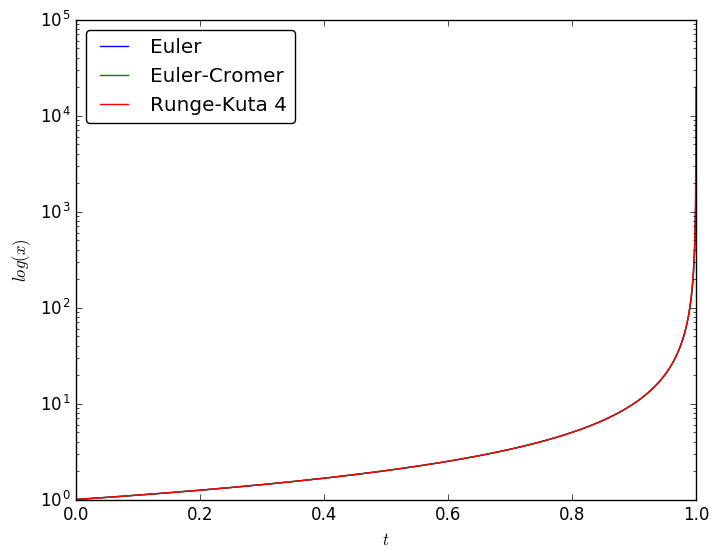

PyObject <matplotlib.legend.Legend object at 0x7fe0e2709f10>

In [8]:
plot(A1[:,1],A1[:,2],label=("Euler"));
plot(A2[:,1],A2[:,2],label=("Euler-Cromer"));
plot(A3[:,1],A3[:,2],label=("Runge-Kuta 4"));
xlabel(L"t")
ylabel(L"log(x)")
yscale("log")
legend(loc="upper left",fancybox="true")

In [9]:
function errtay(f,arre) #calcula la diferencia en valor absoluto de la función con su aproximación numérica.
    n=length(arre[:,1])
    errs = Float64[]
    for i in 1:n
        t=arre[i,1]
        y=arre[i,2]
        v=abs(f(t)-y)
        push!(errs,v)
    end
    return errs
end

errtay (generic function with 1 method)

In [10]:
f(t)=1/(1-t)

f (generic function with 1 method)

In [11]:
graferrA1 = errtay(f,A1);
graferrA2 = errtay(f,A2);
graferrA3 = errtay(f,A3);

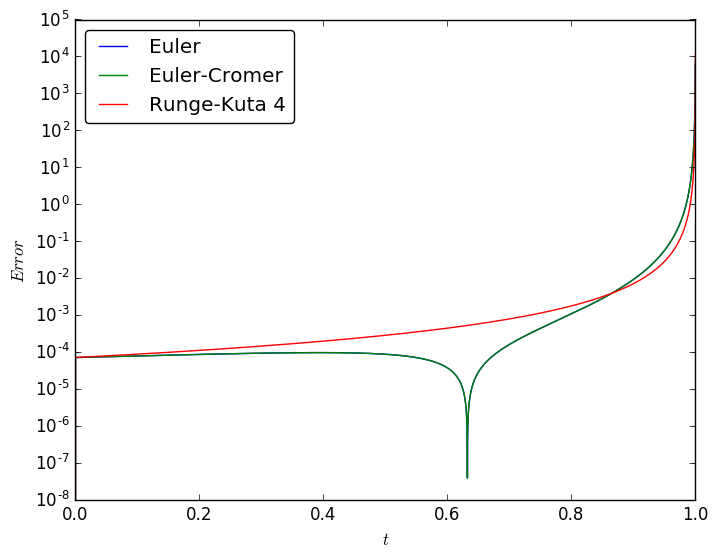

PyObject <matplotlib.legend.Legend object at 0x7fe0de8ac6d0>

In [12]:
plot(A1[:,1],graferrA1[:],label=("Euler"))
plot(A2[:,1],graferrA2[:],label=("Euler-Cromer"))
plot(A3[:,1],graferrA3[:],label=("Runge-Kuta 4"))
yscale("log")
xlabel(L"t")
ylabel(L"Error")
legend(loc="upper left",fancybox="true")

###  Ejercicio 3: Integración con Taylor 

Repite los tres puntos del ejercicio anterior utilizando el método de integración de Taylor.

In [13]:
function coeftay(g0,k)
    cof = Float64[g0]
    npcoeff = 0.0
    x1=g0^2
    push!(cof,x1)
    
    for i in 1:k-2
        npcoeff=vecdot(cof,flipdim(cof,1))/(length(cof))
        push!(cof,npcoeff)
    end
    cof
end

coeftay (generic function with 1 method)

In [14]:
function hache(arreglo,ϵ)
    x=last(arreglo)
    n=length(arreglo)
    h=abs(ϵ/x)^(1/n)
    return h
end

hache (generic function with 1 method)

In [15]:
function revindex(arreglo)
    n=length(arreglo)
    nums = Int64[]
    for i in 1:n
        push!(nums,i)
    end
    flipdim(nums,1)
end

revindex (generic function with 1 method)

In [16]:
function nuevax(coefs, h)
    n=length(coefs)
    index = revindex(coefs)
    m=coefs[index[2,1],1]+coefs[index[1,1],1]*h
    for i in 3:n
        m=m*h
        m=(coefs[index[i,1]]+m)
        #println(m)
    end
    return m
end

nuevax (generic function with 1 method)

In [17]:
function tempo(ϵ,to,tf)
    t=Float64[]
    for i in to:ϵ:tf
        push!(t,i)
    end
    return t
end

tempo (generic function with 1 method)

In [18]:
function taylor(g0,k,ϵ,to,tf)
    equis = Float64[g0]
    tempos = Float64[to]
    t=to
    while abs(1-t)>=0.0001 
        cofs=coeftay(g0,k);
        h=hache(cofs,ϵ);
        g0 = nuevax(cofs,h)
        t+=h
        push!(equis, g0)
        push!(tempos, t)
    end
    return [tempos equis]
end

taylor (generic function with 1 method)

In [19]:
grafs=taylor(1,20,1/2^(60),0,.5);

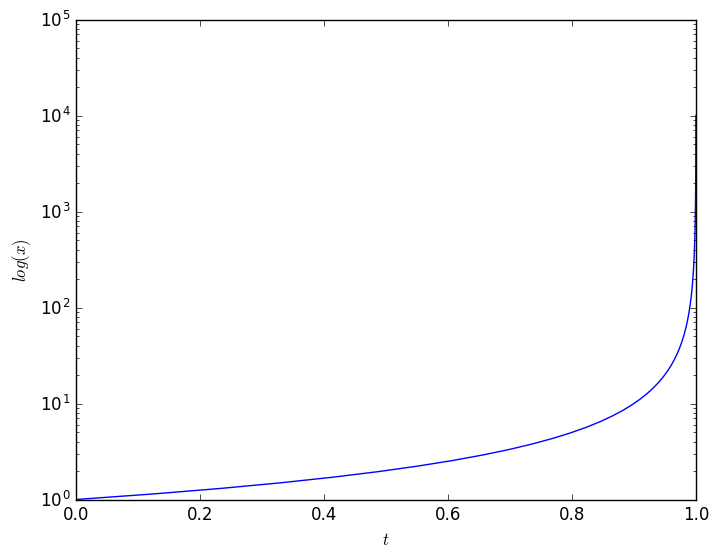

In [20]:
plot(grafs[:,1],grafs[:,2])
xlabel(L"t")
ylabel(L"log(x)")
yscale("log")

In [21]:
graferrtay = errtay(f,grafs);

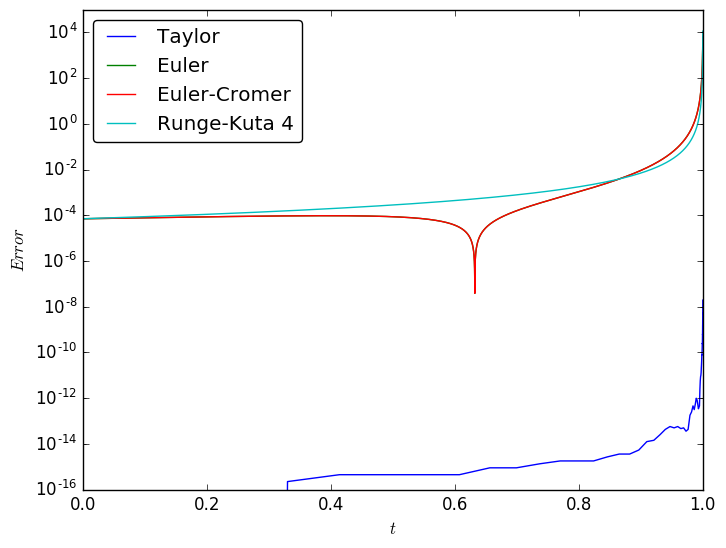

PyObject <matplotlib.legend.Legend object at 0x7fe0de3fedd0>

In [22]:
plot(grafs[:,1],graferrtay[:],label=("Taylor"))
plot(A1[:,1],graferrA1[:],label=("Euler"))
plot(A2[:,1],graferrA2[:],label=("Euler-Cromer"))
plot(A3[:,1],graferrA3[:],label=("Runge-Kuta 4"))
yscale("log")
xlabel(L"t")
ylabel(L"Error")
legend(loc="upper left",fancybox="true")

### Ejercicio 4: Recordatorio

> Memoria minuitur nisi eam exerceas — La memoria disminuye si no la ejercitas (Marco Tulio Cicerón).

Con tus palabras explica (sin utilizar muchas matemáticas) lo siguiente:

* La esencia del método de integración de Taylor.
Resolver ecuaciones diferenciales a través de la expansión de la función en términos de series de Taylor, buscando para ello los coeficientes correspondientes de la expansión mediante una iteración, truncando la serie hasta un determinado grado, calculando el paso necesario en la variable independiente para calcular el punto siguiente en rededor del cual aproximar la función, para finalmente repetir el algoritmo tantas veces sea necesario para avanzar en la variable independiente tanto como se deseé. 

* ¿Qué relación tiene con los duales?
En aquel caso, un dual era una especie de vector, que contenia el valor de la función u su correspondiente derivada, aprovechando eso, bastaba realizar operaciones sencillas entre duales para conocer el nuevo valor de la función y de sus correspondiente derivada. En Taylor, ya que las funciones pueden ser descritas en terminos de los coeficientes (relacionados con el valor de la derivada de n-ésimo orden en rededor del punto a evaluar) de su expansión de las series de Taylor, operamos con dichos coeficientes para conocer el valor de la función en rededor de cierto punto, es más al integrar por este método, en cierto momento es requerido hacer una vectorización de dichos coeficientes para poder operar el algoritmo. 

* ¿Cómo elegimos el paso de avance en el método de Taylor?
El paso de integración está dado por:
$$
h=|(\frac{\epsilon}{x})^{\frac{1}{n}}|
$$
Donde elegimos el valor de $\epsilon$ que nos sirva, usualmente es pequeño, n el orden que elegimos para la serie, y x el valor del coeficiente de mayor orden de la serie distinto de cero.

* ¿Se pueden integrar sistemas de ecuaciones con este método? ¿Por qué?
Si, ya que toda función (en un intervalo bien comportada) tiene serie de Taylor, es pues resolver a cada paso el valor de los coeficientes nececesarios para aproximar la función en rededor de cada punto que se avance en las variables independientes. 